In [1]:
#Group members: Ruobing Wan, Xiao Fang, Zhuoyang Wu

<h2> Classfication</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data['labels'] = ['0' if x<6 else '1' for x in data['quality'] ]

In [5]:
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [7]:
x = data.iloc[:,:-2]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
x = np.array(x)

In [9]:
y = np.array(data["labels"])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2)

<h2>Perceptron</h2>

In [11]:
model = Perceptron()

In [12]:
model.fit(x_train,y_train)

Perceptron()

In [13]:
model.score(x_test,y_test)

0.49375

In [14]:
p_pred = model.predict(x_test)

In [15]:
print("The accuracy this model is:", accuracy_score(y_test, p_pred))

The accuracy this model is: 0.49375


<h3>Tune Model</h3>

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [18]:
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [19]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.590 (0.068)


In [20]:
grid = dict()
grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [21]:
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [22]:
results = search.fit(x_test, y_test)

In [23]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.560
Config: {'eta0': 0.001}


In [24]:
# define model
modelp = Perceptron(eta0=0.01)

In [25]:
# define grid
grid1 = dict()
grid1['max_iter'] = [1, 10, 100, 1000]
# define search
search = GridSearchCV(modelp, grid1, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x_train, y_train)


/Users/xiaofang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [26]:
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

Mean Accuracy: 0.591
Config: {'max_iter': 10}


In [27]:
#define model 
modelp = Perceptron(eta0=0.01,max_iter=100,tol=None)

In [28]:
modelp.fit(x_train, y_train)

Perceptron(eta0=0.01, max_iter=100, tol=None)

In [29]:
modelp.score(x_test, y_test)

0.60625

In [30]:
p_p = modelp.predict(x_test)

In [31]:
print("The accuracy this model is:", accuracy_score(y_test, p_p))

The accuracy this model is: 0.60625


<h2>SVM</h2>

In [32]:
from sklearn import svm

In [33]:
model = svm.SVC()

In [34]:
model.fit(x_train,y_train)

SVC()

In [35]:
p_pred = model.predict(x_test)

In [36]:
print("The accuracy this model is:", accuracy_score(y_test, p_pred))

The accuracy this model is: 0.6125


<h3>Tune Model</h3>

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [38]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [39]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.630 (0.037)


In [40]:
grid = dict()
grid['C'] = [1, 10, 100]

In [41]:
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [42]:
results = search.fit(x_train, y_train)

In [43]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.737
Config: {'C': 100}


In [44]:
# define model
models = svm.SVC(C=100)

In [45]:
models.fit(x_train,y_train)

SVC(C=100)

In [46]:
models.score(x_test, y_test)

0.740625

In [47]:
s_p = models.predict(x_test)

In [48]:

print("The accuracy this model is:",  accuracy_score(y_test, s_p))

The accuracy this model is: 0.740625


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, s_p)

array([[128,  35],
       [ 48, 109]])

<h2>Naive Bayes( BernoulliNB and GaussianNB )</h2>

In [51]:
from sklearn.naive_bayes import BernoulliNB

In [52]:
model = BernoulliNB()

In [53]:
model.fit(x_train,y_train)

BernoulliNB()

In [54]:
model.score(x_test, y_test)

0.509375

In [55]:
b_pred = model.predict(x_test)

In [56]:
print("The accuracy this model is:",  accuracy_score(y_test, b_pred))

The accuracy this model is: 0.509375


In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gnb = GaussianNB()

In [59]:
gnb.fit(x_train,y_train)

GaussianNB()

In [60]:
gnb.score(x_test,y_test)

0.7

In [61]:
g_pred = gnb.predict(x_test)

In [62]:
print("The accuracy this model is:",  accuracy_score(y_test, g_pred))

The accuracy this model is: 0.7


<h3>Tune Model</h3>

In [63]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(gnb, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [64]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.732 (0.042)


In [65]:
grid =dict()
grid['var_smoothing']=[1e-3,1e-6,1e-9,1e-12,1e-15]

In [66]:
search = GridSearchCV(gnb, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)

In [67]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.733
Config: {'var_smoothing': 1e-12}


In [68]:
# define model
modelg = GaussianNB(priors=None,var_smoothing= 1e-09)

In [69]:
modelg.fit(x_train,y_train)

GaussianNB()

In [70]:
modelg.score(x_test, y_test)

0.7

In [71]:
g_p = modelg.predict(x_test)
print("The accuracy this model is:",  accuracy_score(y_test, g_p))

The accuracy this model is: 0.7


<h2>Decision Tree</h2>

In [72]:
from sklearn import tree

In [73]:
clf = tree.DecisionTreeClassifier()

In [74]:
clf = clf.fit(x_train, y_train)

In [75]:
clf.score(x_test,y_test)

0.675

In [76]:
c_pred = clf.predict(x_test)

In [77]:
print("The accuracy this model is:",  accuracy_score(y_test, c_pred))

The accuracy this model is: 0.675


<h3>Tune Model</h3>

In [78]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [79]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.746 (0.041)


In [80]:
clf = tree.DecisionTreeClassifier(criterion = "entropy")

In [81]:
clf = clf.fit(x_train, y_train)

In [82]:
clf.score(x_test,y_test)

0.721875

In [83]:
cc_pred = clf.predict(x_test)

In [84]:
print("The accuracy this model is:",  accuracy_score(y_test, cc_pred))

The accuracy this model is: 0.721875


<h2>logistic</h2>

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
clf1 = LogisticRegression(max_iter=1000).fit(x_train, y_train)

In [87]:
clf1.score(x_test,y_test)

0.734375

In [88]:
c_pred1 = clf.predict(x_test)

In [89]:
print("The accuracy this model is:",  accuracy_score(y_test, c_pred1))

The accuracy this model is: 0.721875


<h2>KNN</h2>

In [90]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)


In [91]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [92]:
neigh.score(x_test,y_test)

0.65625

In [93]:
k_pred =  neigh.predict(x_test)

In [94]:
print("The accuracy this model is:",  accuracy_score(y_test, k_pred))

The accuracy this model is: 0.65625


<h3>Tune Model</h3>

Highest Accuracy Rate: 0.7 at K = 50


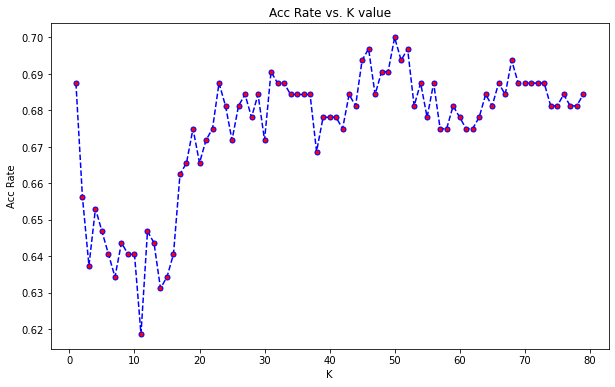

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
from sklearn import metrics
accuracy_rate=[]

#calculate optimal value of k
for i in range(1,80):
    knn=KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy_rate.append(knn.score(x_test,y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,80), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Acc Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Acc Rate')
print("Highest Accuracy Rate:", max(accuracy_rate),"at K =",accuracy_rate.index(max(accuracy_rate))+1)

In [96]:
modeln = KNeighborsClassifier(n_neighbors=1)

In [97]:
modeln.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [98]:
modeln.score(x_test,y_test)

0.6875

In [99]:
n_pred =  modeln.predict(x_test)

In [100]:
print("The accuracy this model is:",  accuracy_score(y_test, n_pred))

The accuracy this model is: 0.6875


<h2>Random Forest</h2>

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics

In [102]:
# create model variable
rnd = RandomForestClassifier(random_state=42,n_estimators=10)
 
# fit the model
fit_rnd = rnd.fit(x_train,y_train)
 
# checking the accuracy score
#rnd_train_score = rnd.score(X_train_final,ytest) 
rnd_test_score = rnd.score(x_test,y_test) 


In [103]:
#print('The mean accuracy on the training data is : ',rnd_train_score)
print('The mean accuracy on the testing data is : ',rnd_test_score)

The mean accuracy on the testing data is :  0.78125


In [104]:
rf_pred = rnd.predict(x_test)

In [105]:
print('The accuracy on the prediction is :',metrics.accuracy_score(y_test, rf_pred))

The accuracy on the prediction is : 0.78125


<h3>Tune the Model</h3>

In [106]:
# Create the parameter grid based on the results of random search 
param_grid = {
 'bootstrap': [True],
 'max_depth': [80, 90, 100, 110],
 'max_features': [2, 3],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [8, 10, 12],
 'n_estimators': [10, 50, 100],
 'random_state': [50, 100, 200, 300]
}


In [107]:
# Create a based model
rf = RandomForestClassifier()

In [108]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
 cv = 3, n_jobs = -1, verbose = 2)


In [109]:
# Fit the grid search to the data
grid_search.fit(x_test,y_test)
grid_search.best_params_

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 2506 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 2577 out of 2592 | elapsed:   22.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:   22.5s finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50,
 'random_state': 300}

In [110]:
rnd_new = RandomForestClassifier( bootstrap = True,
 max_depth= 80,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 12,
 n_estimators = 50,
 random_state= 300)

In [111]:
fit_rnd_new = rnd_new.fit(x_train,y_train)
rnd_new_test_score = rnd_new.score(x_test,y_test) 

In [112]:
#print('The mean accuracy on the training data is : ',rnd_train_score)
print('The mean accuracy on the testing data is : ',rnd_new_test_score)

The mean accuracy on the testing data is :  0.81875


In [113]:
rf_new_pred = rnd_new.predict(x_test)

In [114]:
print('The accuracy on the prediction is :',metrics.accuracy_score(y_test, rf_new_pred))

The accuracy on the prediction is : 0.81875


In [115]:
confusion_matrix(y_test, s_p)

array([[128,  35],
       [ 48, 109]])

In [116]:
tp_svm = confusion_matrix(y_test,s_p )[0,0]
fp_svm = confusion_matrix(y_test, s_p)[0,1]
tn_svm = confusion_matrix(y_test, s_p)[1,1]
fn_svm = confusion_matrix(y_test, s_p)[1,0]

In [117]:
confusion_matrix(y_test,rf_new_pred )

array([[135,  28],
       [ 30, 127]])

In [118]:
tp_rf = confusion_matrix(y_test, rf_new_pred)[0,0]
fp_rf = confusion_matrix(y_test, rf_new_pred)[0,1]
tn_rf = confusion_matrix(y_test, rf_new_pred)[1,1]
fn_rf = confusion_matrix(y_test, rf_new_pred)[1,0]

In [119]:
models = [ 
          ('SVM ', tp_svm, fp_svm, tn_svm, fn_svm),
          ('RF', tp_rf, fp_rf, tn_rf, fn_rf)
         ]

In [120]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative'])
predict

,Model,True Positive,False Positive,True Negative,False Negative
0,SVM,128,35,109,48
1,RF,135,28,127,30


### Feature Importance for Random Forest Classification Model

In [121]:
column = []

for header in data.columns:
    if header != "quality" and header != "labels":
        column.append(header)
column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

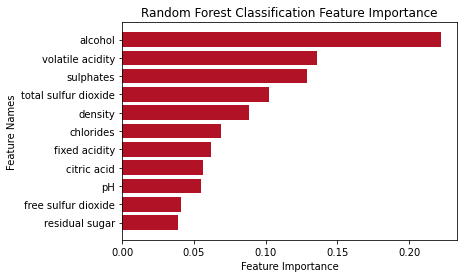

In [122]:
importance = rnd_new.feature_importances_
indices = np.argsort(importance)

plt.barh(range(len(indices)), importance[indices], color='#b11226', align='center')
plt.yticks(range(len(indices)), [column[i] for i in indices])
plt.title("Random Forest Classification " + 'Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.show()